In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

In [8]:
# load singal.csv files
df_signal = pd.read_csv("data/signal.csv", index_col=0)
display(df_signal.head())

,start_time,end_time,location_id,clip
_id,,,,
"""6337cc781bb12aca18a8f89b""","10/1/2022, 1:10:46 AM","10/1/2022, 1:13:28 AM","""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com..."
"""6337fa791bb12aca18a8f8aa""","10/1/2022, 4:25:25 AM","10/1/2022, 4:29:45 AM","""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com..."
"""6337fb731bb12aca18a8f8ab""","10/1/2022, 4:31:48 AM","10/1/2022, 4:33:55 AM","""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com..."
"""6337fc201bb12aca18a8f8ac""","10/1/2022, 4:35:59 AM","10/1/2022, 4:36:48 AM","""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com..."
"""633803df1bb12aca18a8f8ae""","10/1/2022, 5:09:01 AM","10/1/2022, 5:09:51 AM","""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com..."


In [3]:

# compare the datat in "10/2/2022"
# 第一种情况, 当在火车栅栏放下来后,有没有tres的数据

df_signal = df_signal[df_signal['start_time'].str.match('^10/2/2022.*M$')== True]
display(df_signal.head())


,start_time,end_time,location_id,clip
_id,,,,
"""633917f31bb12aca18a8fa0a""","10/2/2022, 12:47:26 AM","10/2/2022, 12:47:47 AM","""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com..."
"""633918101bb12aca18a8fa0b""","10/2/2022, 12:47:49 AM","10/2/2022, 12:48:16 AM","""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com..."
"""63391a2b1bb12aca18a8fa11""","10/2/2022, 12:56:20 AM","10/2/2022, 12:57:15 AM","""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com..."
"""63391fea1bb12aca18a8fa15""","10/2/2022, 1:21:10 AM","10/2/2022, 1:21:46 AM","""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com..."
"""633925e21bb12aca18a8fa18""","10/2/2022, 1:44:36 AM","10/2/2022, 1:47:14 AM","""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com..."


"\ndf_signal = df_signal[df_signal['start_time'].str.match('^10/2/2022.*M$')== True]\n#df_tress_1002 = df_signal.loc[df_signal['validation'] == some_value]\ndisplay(df_tress_1002.head())\ndf_signal\n"

,start_time,end_time,location_id,clip,duration,duration_time
_id,,,,,,
"""6337cc781bb12aca18a8f89b""",2022-10-01 01:10:46,2022-10-01 01:13:28,"""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com...",0 days 00:02:42,162.0
"""6337fa791bb12aca18a8f8aa""",2022-10-01 04:25:25,2022-10-01 04:29:45,"""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com...",0 days 00:04:20,260.0
"""6337fb731bb12aca18a8f8ab""",2022-10-01 04:31:48,2022-10-01 04:33:55,"""6255092968981447d491ef3a""","=HYPERLINK(""https://igct-test.s3.amazonaws.com...",0 days 00:02:07,127.0


<Figure size 720x360 with 0 Axes>

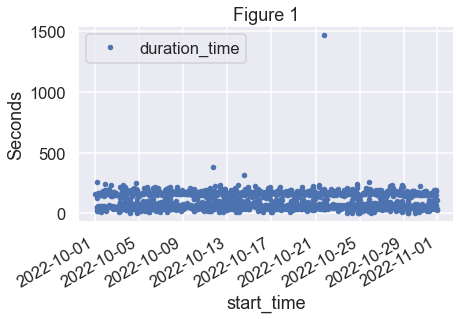

In [9]:
# Change the string to datetime
df_signal['start_time'] = pd.to_datetime(df_signal['start_time'])
df_signal['end_time'] = pd.to_datetime(df_signal['end_time'])

# Calculate "duration"
df_signal['duration'] = (df_signal['end_time']-df_signal['start_time'])
df_signal['duration_time'] = (df_signal['end_time']-df_signal['start_time']).dt.total_seconds()
display(df_signal.head(3))

plt.figure(figsize=(10, 5))
plot1 = df_signal.plot(x='start_time', y='duration_time', style=".")
plot1.set_ylabel('Seconds')
plot1.set_title('Figure 1')
plt.show()

In [10]:
# Remove Outliers in Data, keep between 0.5% and 99.5%
q_low = df_signal["duration_time"].quantile(0.005)
q_hi  = df_signal["duration_time"].quantile(0.995)
df_signal_filter = df_signal[(df_signal["duration_time"] < q_hi) & (df_signal["duration_time"] > q_low)]



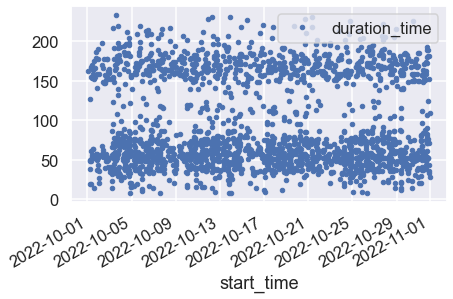

In [11]:
plot1 = df_signal_filter.plot(x='start_time', y='duration_time', style=".")

/Users/liuqinyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liuqinyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/liuqinyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/User

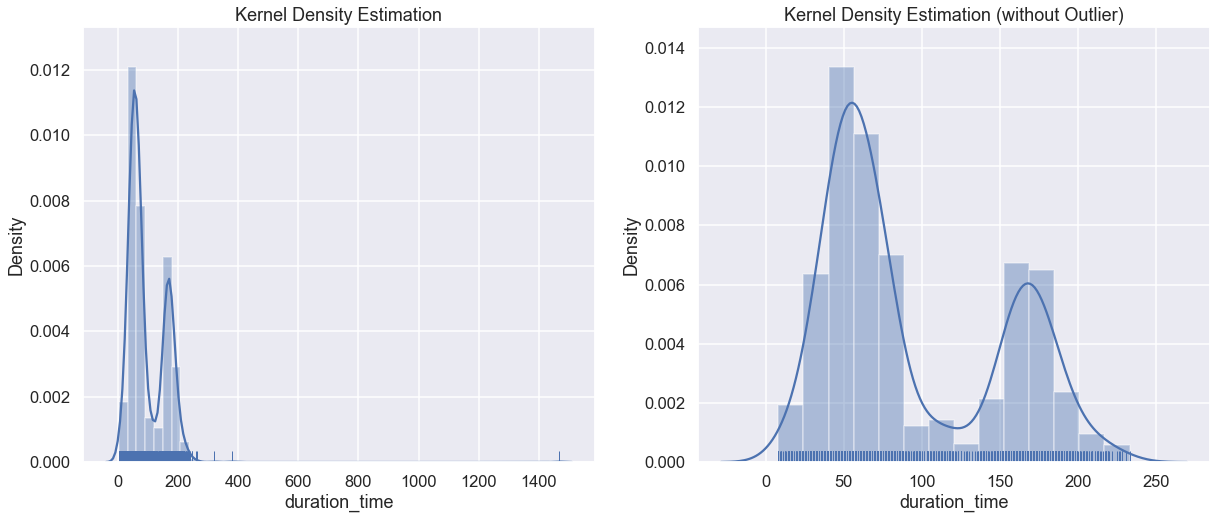

In [12]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
plot1 = sns.distplot((df_signal['duration_time']), kde=True, rug = True)
plot1.set_ylabel('Density')
plot1.set_title('Kernel Density Estimation')


plt.subplot(122)
plot2 = sns.distplot((df_signal_filter['duration_time']), kde=True, rug = True)
plot2.set_ylabel('Density')
plot2.set_title('Kernel Density Estimation (without Outlier)')


plt.show()

## Conclusion

When analyzing signal.csv, I chose to use pandas to analyze the data.

In "Figure1", the x-axis is the time when the signal is on and the y-axis is the duration of the signal. In this figure, we can see that most of the lights last less than 400s.

However, since the data in the image is not clear enough, I chose to remove the extreme values of the csv (keeping 0.5% and 99.5% of the data) to make the image clearer. 

In the next two figures, using the Kernel Density Estimation method, we can see that most of the signal durations remain between 25 and 80 seconds, and between 140 and 180 seconds. 

And I guess it is probably because there are two different types of trains on this track, resulting in two pass times